# Concrete Strength dataset 

This work is an analysis of the application of linear regression methods on concrete data. The goal is to predict the compressive strength of the concrete for some givern characteristics

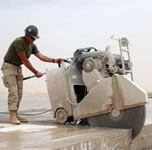

This dataset was provided by **I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)** and it's available at https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
dataset = pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Brief description

In [50]:
print("Number of observations: " + str(dataset.shape[0]))
print("Number of predictor variables: " + str(dataset.shape[1]))
print("Predicted variable: csMPa")

print('\n')
print('''
Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable
''')

Number of observations: 1030
Number of predictor variables: 9
Predicted variable: csMPa



Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable



### Unconditional mono-variate analysis

In [5]:
def custom_describe(dataset):
    df = dataset.describe().T
    df = df.drop(columns=['count'])
    df['skewness'] = dataset.skew(axis=0).values
    df['maxmin_ratio'] = df['max']/df['min']
    return df

custom_describe(dataset)

,mean,std,min,25%,50%,75%,max,skewness,maxmin_ratio
cement,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,0.509481,5.294118
slag,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,0.800717,inf
flyash,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,0.537354,inf
water,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,0.074628,2.027915
superplasticizer,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,0.907203,inf
coarseaggregate,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,-0.040220,1.429463
fineaggregate,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,-0.253010,1.671044
age,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,3.269177,365.000000
csMPa,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,0.416977,35.450644


#### Unconditional histogram

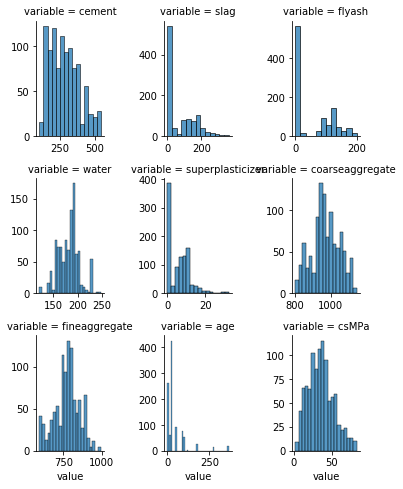

In [6]:
df = dataset

g = sns.FacetGrid(df.melt(), col="variable", col_wrap=3, sharex=False, sharey=False, height=2.3, aspect=.8)
g.map(sns.histplot, "value")

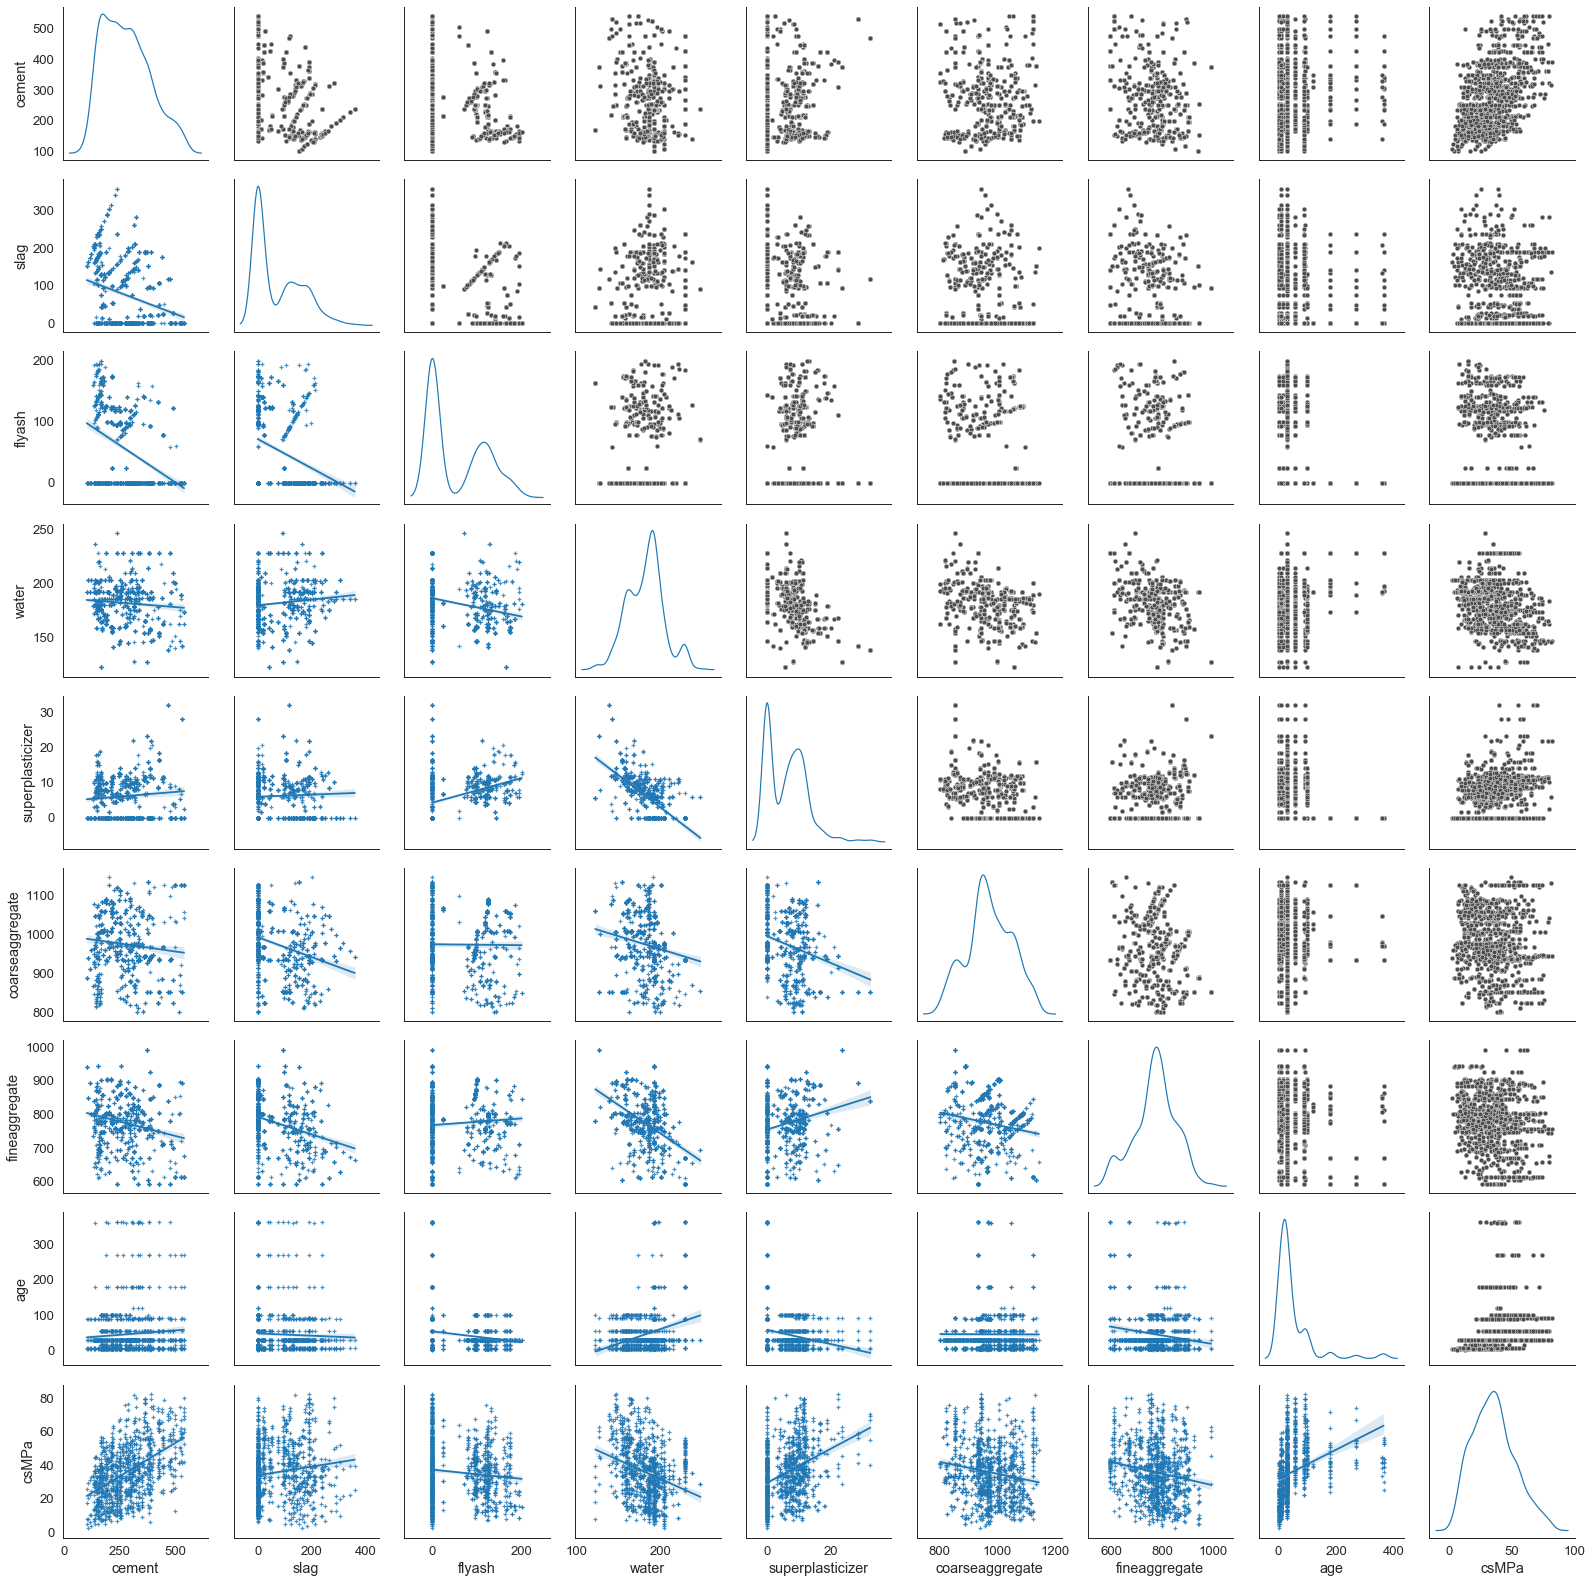

In [26]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

g = sns.PairGrid(dataset, diag_sharey=False)
g.map_lower(sns.regplot, marker="+")
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot, color=".3")

In [27]:
df.corr().round(2)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
flyash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplasticizer,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseaggregate,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineaggregate,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
csMPa,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


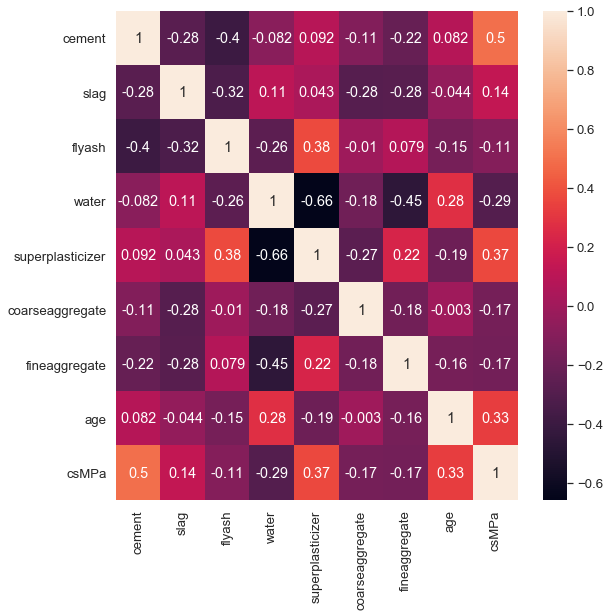

In [28]:
sns.set(font_scale=1.2)
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr().round(3), annot=True, ax=ax)

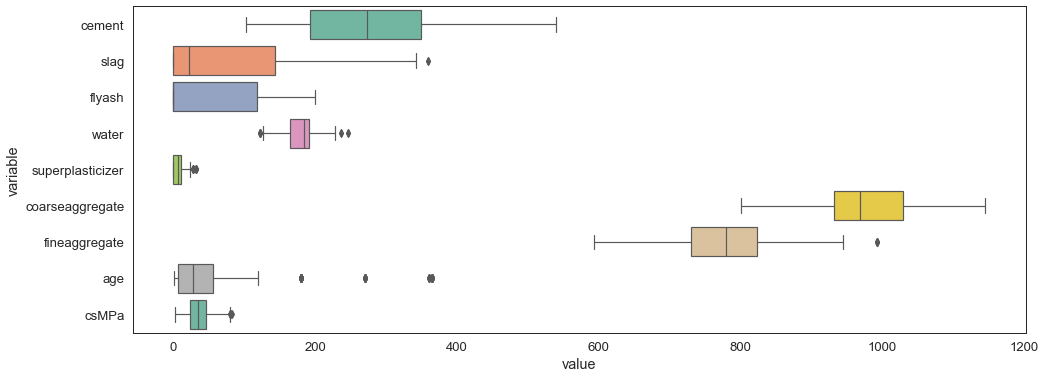

In [7]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

plt.figure(figsize=(16, 6))
g = sns.boxplot(x="value", y="variable", data=df.melt(), orient='h', palette="Set2")

## unconditional multi-variate analysis

In [35]:
df = custom_describe(dataset.drop(columns=['csMPa']))
df = df[df.maxmin_ratio > 20]
columns = df.index.values
for item in columns:
    print(item + ' maxmin_ratio: ' + str(df[df.index == item].maxmin_ratio.values))

slag maxmin_ratio: [inf]
flyash maxmin_ratio: [inf]
superplasticizer maxmin_ratio: [inf]
age maxmin_ratio: [365.]


slag, flyash and superplasticizer have infinite `maxmin_ratio` due to the presence of zero values. Yeo-Johnson should be a more appropriate transformation

### after transformations + centering + scaling

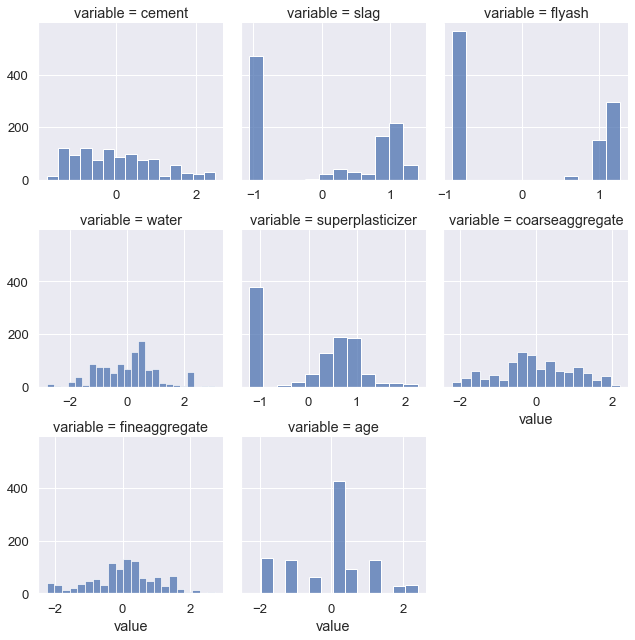

In [37]:
df = dataset

for item in columns:
    df[item] = power_transform(df[item].values.reshape(-1,1), method='yeo-johnson').reshape(1,-1)[0]
    
df = df.drop(columns=['csMPa'])

scaler = StandardScaler()
scaler.fit(df)
data = scaler.transform(df)

for i, col in enumerate(df.columns):
    df[col] = data[:,i]


g = sns.FacetGrid(df.melt(), col="variable", col_wrap=3, sharex=False)
g.map(sns.histplot, "value")

In [40]:
pca = PCA(n_components=8)
pca.fit(df)
print(pca.explained_variance_ratio_)

[0.27887022 0.18394842 0.15460293 0.13081199 0.12295224 0.09961089
 0.0196343  0.009569  ]


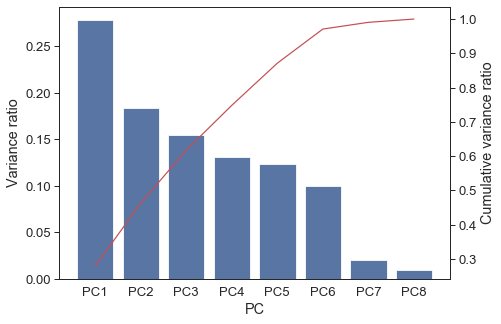

In [42]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

pca_data = pd.DataFrame({
    'PC': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
    'Variance ratio': pca.explained_variance_ratio_,
    'Cumulative variance ratio': np.cumsum(pca.explained_variance_ratio_)
})

f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x='PC', y='Variance ratio', data=pca_data, color='b', ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='PC', y='Cumulative variance ratio', data=pca_data, ax=ax2, color='r')


In [43]:
print("Explained variance of 2 first Principal Components: {:.3}".format(np.sum(pca.explained_variance_ratio_[:2])))

Explained variance of 2 first Principal Components: 0.463


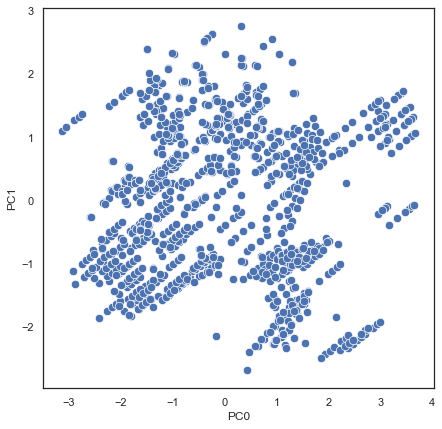

In [47]:
sns.set_context("notebook")

pca = PCA(n_components=2)
pca.fit(df)
transformed_df = pd.DataFrame(pca.transform(df))
transformed_df['csMPa'] = dataset['csMPa']
transformed_df.columns = ['PC0', 'PC1', 'output']

f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=transformed_df, x="PC0", y="PC1", ax=ax, s=70)

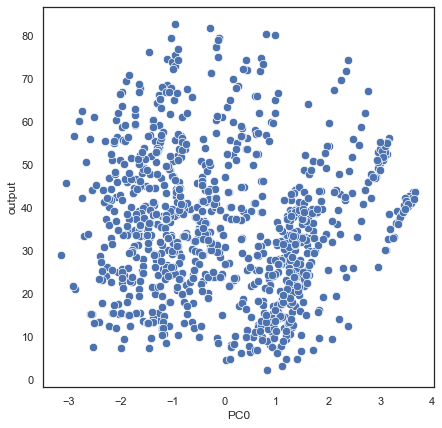

In [48]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=transformed_df, x="PC0", y="output", ax=ax, s=70)

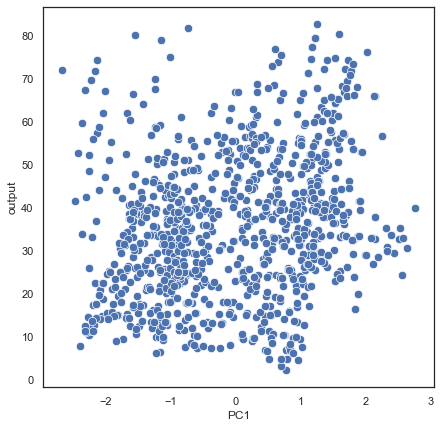

In [49]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=transformed_df, x="PC1", y="output", ax=ax, s=70)

# Models